In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt


In [4]:
df=pd.read_csv("train.csv")

In [5]:

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
#group data using index in a pivot table
#with single index
table = pd.pivot_table(data=df,index=['Sex'])
table

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Sex,,,,,,,
female,27.915709,44.479818,0.649682,431.028662,2.159236,0.694268,0.742038
male,30.726645,25.523893,0.235702,454.147314,2.389948,0.429809,0.188908


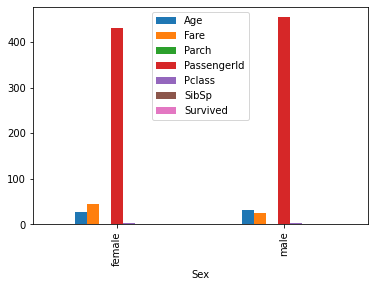

In [21]:
table.plot(kind='bar');

In [22]:
#group data in pivot table with multiple index
table = pd.pivot_table(data=df,index=['Sex','Pclass'])
table

Age        Fare     Parch  PassengerId     SibSp  \
Sex    Pclass                                                           
female 1       34.611765  106.125798  0.457447   469.212766  0.553191   
       2       28.722973   21.970121  0.605263   443.105263  0.486842   
       3       21.750000   16.118810  0.798611   399.729167  0.895833   
male   1       41.281386   67.226127  0.278689   455.729508  0.311475   
       2       30.740707   19.741782  0.222222   447.962963  0.342593   
       3       26.507589   12.661633  0.224784   455.515850  0.498559   

               Survived  
Sex    Pclass            
female 1       0.968085  
       2       0.921053  
       3       0.500000  
male   1       0.368852  
       2       0.157407  
       3       0.135447

In [7]:
table = pd.pivot_table(df,index=['Sex','Embarked'])
table


Age       Fare     Parch  PassengerId    Pclass  \
Sex    Embarked                                                          
female C         28.344262  75.169805  0.493151   437.315068  1.726027   
       Q         24.291667  12.634958  0.222222   374.138889  2.888889   
       S         27.771505  38.740929  0.788177   438.709360  2.197044   
male   C         32.998841  48.262109  0.263158   451.536842  2.010526   
       Q         30.937500  13.838922  0.121951   456.317073  2.926829   
       S         30.291440  21.711996  0.240363   454.507937  2.421769   

                    SibSp  Survived  
Sex    Embarked                      
female C         0.547945  0.876712  
       Q         0.222222  0.750000  
       S         0.837438  0.689655  
male   C         0.263158  0.305263  
       Q         0.609756  0.073171  
       S         0.448980  0.174603

In [8]:
table = pd.pivot_table(df,index=['Sex'],columns=['Pclass'],values=['Survived'],aggfunc=np.sum)
table

Survived        
Pclass        1   2   3
Sex                    
female       91  70  72
male         45  17  47

In [9]:
table = pd.pivot_table(df,index=['Sex','Pclass'],aggfunc={'Age':np.mean,'Survived':np.sum})
table

Age  Survived
Sex    Pclass                     
female 1       34.611765        91
       2       28.722973        70
       3       21.750000        72
male   1       41.281386        45
       2       30.740707        17
       3       26.507589        47

In [10]:
table = pd.pivot_table(df,index=['Sex'],columns=['Pclass'],values=['Survived'],aggfunc=np.sum)
table

Survived        
Pclass        1   2   3
Sex                    
female       91  70  72
male         45  17  47

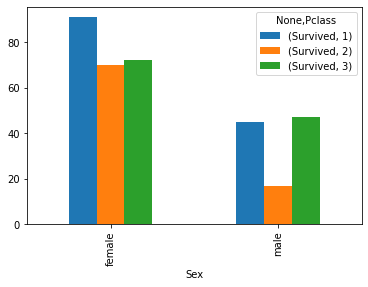

In [11]:
table.plot(kind='bar');

In [12]:
table = pd.pivot_table(df,index=['Sex','Pclass'],values=['Survived'], aggfunc=np.mean)
table

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

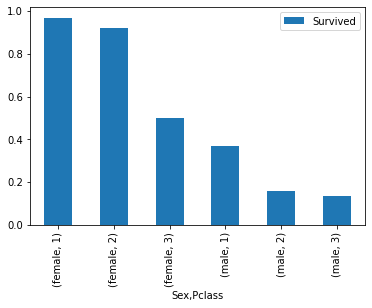

In [13]:
table.plot(kind='bar');

In [14]:
#pivot_table even allows you to deal with the missing values through the parameters dropna and fill_value:

In [15]:
#display null values
table = pd.pivot_table(df,index=['Sex','Survived','Pclass'],columns=['Embarked'],values=['Age'],aggfunc=np.mean)
table

Age                      
Embarked                        C          Q          S
Sex    Survived Pclass                                 
female 0        1       50.000000        NaN  13.500000
                2             NaN        NaN  36.000000
                3       20.700000  28.100000  23.688889
       1        1       35.675676  33.000000  33.619048
                2       19.142857  30.000000  29.091667
                3       11.045455  17.600000  22.548387
male   0        1       43.050000  44.000000  45.362500
                2       29.500000  57.000000  33.414474
                3       27.555556  28.076923  27.168478
       1        1       36.437500        NaN  36.121667
                2        1.000000        NaN  17.095000
                3       18.488571  29.000000  22.933333

In [17]:
#handling null values by replacing NaN values with the mean value from the ‘Age’ column:

table = pd.pivot_table(df,index=['Sex','Survived','Pclass'],columns=['Embarked'],values=['Age'],aggfunc=np.mean,fill_value=np.mean(df['Age']))
table

Age                      
Embarked                        C          Q          S
Sex    Survived Pclass                                 
female 0        1       50.000000  29.699118  13.500000
                2       29.699118  29.699118  36.000000
                3       20.700000  28.100000  23.688889
       1        1       35.675676  33.000000  33.619048
                2       19.142857  30.000000  29.091667
                3       11.045455  17.600000  22.548387
male   0        1       43.050000  44.000000  45.362500
                2       29.500000  57.000000  33.414474
                3       27.555556  28.076923  27.168478
       1        1       36.437500  29.699118  36.121667
                2        1.000000  29.699118  17.095000
                3       18.488571  29.000000  22.933333

KeyError: 'Ticket'